## Importando as bibliotecas

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Funcoes Utilizadas

In [82]:
#Funcao simples que mostra uma imagem na tela
def show_img(image):
    plt.figure()
    plt.imshow(image)

    

def img_to_grey(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)


def bin_otsu(imagem):
    return cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

def gaussian_blur(imagem):
    value = (35, 35)
    return cv2.GaussianBlur(imagem, value, 0)

def find_contorn(img_bin):
    contours = ""
    (version, _, _) = cv2.__version__.split('.')
    if version == '3':
        image, contours, hierarchy = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #Estamos caindo aqui
    elif version == '2' or version == '4':
        contours, hierarchy = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    cnt = max(contours, key = lambda x: cv2.contourArea(x))
    return cnt

def find_img_contorn(imagem, contorn):
    imagem_2 = cv2.drawContours(imagem.copy(), [contorn], 0, (0, 255, 0), 3)
    show_img(imagem_2)

## Imagem de teste

### Pré-Processamento

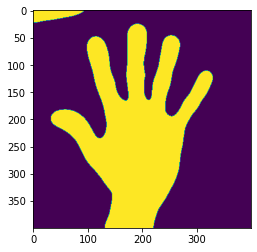

In [42]:
imagem_teste = "base1/mao5.jpg"
imagem = cv2.imread(imagem_teste)
#Aplicando binarizacao de OTSU
#_, thresh1 = cv2.theshold(grey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#show_img(imagem)

img_grey = img_to_grey(imagem)
#show_img(img_grey)

img_gaus = gaussian_blur(img_grey)
#show_img(img_gaus)

img_bin = bin_otsu(img_gaus)
show_img(img_bin)


### Contorno

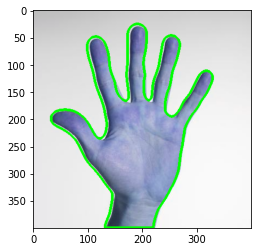

In [83]:
contorno = find_contorn(img_bin)
find_img_contorn(imagem, contorno)

#show_img(img_contorn)